In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [47]:
import pickle
with open('Paruosti_duomenys.pkl', 'rb') as file:
    df_Elektra = pickle.load(file)

In [48]:
def DecTree_Regresorius(df, skaicius=5):
    df_test = df
    X = df_test.drop(columns=['Viena laiko zona'])
    y = df_test['Viena laiko zona']

    # Padalijame į treniravimo ir testavimo rinkinius
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizuojame duomenis
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Sukuriame Decision Tree Regressor
    regressor = DecisionTreeRegressor(random_state=42)

    param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    # Naudojame GridSearchCV geriausiems parametrams rasti
    grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=skaicius, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Geriausi parametrai
    best_params = grid_search.best_params_

    # Geriausias modelis
    best_model = grid_search.best_estimator_

    # Atliekame prognozes su geriausiu modeliu
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Vertiname modelį
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Kryžminė validacija su pilnu duomenų rinkiniu
    X_combined = pd.concat([X_train, X_test])
    y_combined = pd.concat([y_train, y_test])
    X_combined_scaled = scaler.fit_transform(X_combined)

    cv_scores = cross_val_score(best_model, X_combined_scaled, y_combined, cv=skaicius, scoring='r2')

    # Požymių svarba
    feature_importances = best_model.feature_importances_
    features = X.columns

    # Požymių svarbos vizualizacija
    indices = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
    plt.xticks(range(X.shape[1]), features[indices], rotation=45)
    plt.tight_layout()
    plt.show()

    # Rezultatų spausdinimas
    print(f'Geriausi parametrai: {best_params}')
    print(f'Treniravimo MSE: {train_mse}')
    print(f'Testavimo MSE: {test_mse}')
    print(f'Treniravimo R2: {train_r2}')
    print(f'Testavimo R2: {test_r2}')

    print(f'Kryžminės validacijos (cv=5) MSE reikšmės: {cv_scores}')
    print(f'Kryžminės validacijos (cv=5) vidutinis MSE: {cv_scores.mean()}')



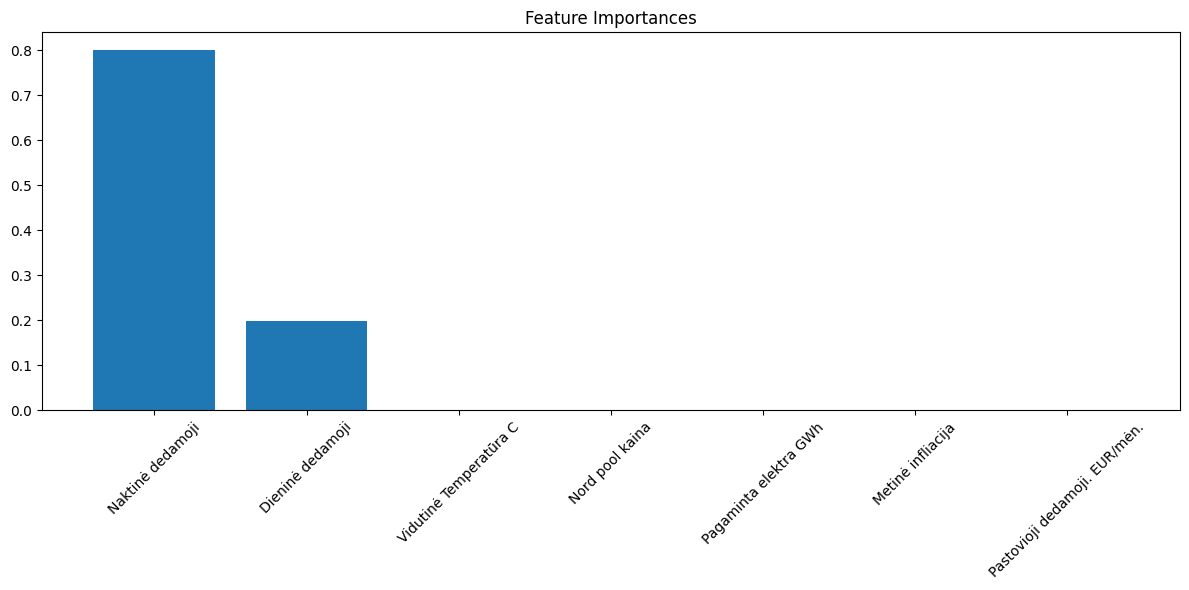

Geriausi parametrai: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Treniravimo MSE: 1.9677979866565238e-34
Testavimo MSE: 2.173913043478265e-06
Treniravimo R2: 1.0
Testavimo R2: 0.9990443758611004
Kryžminės validacijos (cv=5) MSE reikšmės: [0.9823159  0.9979368  0.99368855 0.99019956 0.99904438]
Kryžminės validacijos (cv=5) vidutinis MSE: 0.9926370367983445


In [49]:
DecTree_Regresorius(df_Elektra)

In [50]:
def Linear_regresorius(df, skaicius=5):
    df_test = df
    X = df_test.drop(columns=['Viena laiko zona'])
    y = df_test['Viena laiko zona']

    # Padalijame į treniravimo ir testavimo rinkinius
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizuojame duomenis
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Sukuriame Linear Regression modelį
    regressor = LinearRegression()

    # Treniruojame modelį
    regressor.fit(X_train_scaled, y_train)

    # Atliekame prognozes
    y_train_pred = regressor.predict(X_train_scaled)
    y_test_pred = regressor.predict(X_test_scaled)

    # Vertiname modelį
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Kryžminė validacija su pilnu duomenų rinkiniu
    X_combined = pd.concat([X_train, X_test])
    y_combined = pd.concat([y_train, y_test])
    X_combined_scaled = scaler.fit_transform(X_combined)

    cv_scores = cross_val_score(regressor, X_combined_scaled, y_combined, cv=skaicius, scoring='r2')

    # Koeficientai
    coefficients = regressor.coef_
    intercept = regressor.intercept_

    # Koeficientų vizualizacija
    features = X.columns
    indices = np.argsort(np.abs(coefficients))[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Coefficients")
    plt.bar(range(X.shape[1]), coefficients[indices], align="center")
    plt.xticks(range(X.shape[1]), features[indices], rotation=45)
    plt.tight_layout()
    plt.show()

    # Rezultatų spausdinimas
    print(f'Treniravimo MSE: {train_mse}')
    print(f'Testavimo MSE: {test_mse}')
    print(f'Treniravimo R2: {train_r2}')
    print(f'Testavimo R2: {test_r2}')

    print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores}')
    print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores.mean()}')



In [51]:
from sklearn.linear_model import LinearRegression

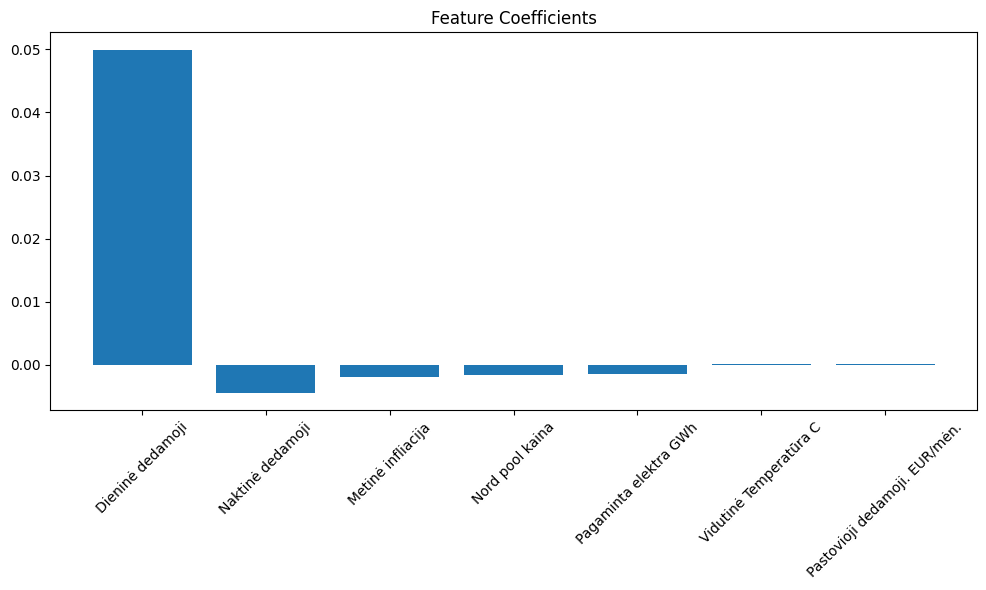

Treniravimo MSE: 1.651670797183951e-05
Testavimo MSE: 2.1659067561101926e-05
Treniravimo R2: 0.9916796444229942
Testavimo R2: 0.9904789532177751
Kryžminės validacijos (cv=5) R2 reikšmės: [0.99083709 0.98349105 0.99130874 0.98691869 0.99047895]
Kryžminės validacijos (cv=5) vidutinis R2: 0.9886069053187615


In [52]:
Linear_regresorius(df_Elektra)

In [53]:
def Ridge_regresorius(df, skaicius=5):
    df_test = df
    X = df_test.drop(columns=['Viena laiko zona'])
    y = df_test['Viena laiko zona']

    # Padalijame į treniravimo ir testavimo rinkinius
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizuojame duomenis
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Sukuriame Ridge Regression modelį
    ridge = Ridge()

    # Nustatome hiperparametrų tinklą
    param_grid = {
        'alpha': [0.001, 0.01, 0.5, 1, 10]
    }

    # Naudojame GridSearchCV geriausiems parametrams rasti
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    # Geriausi parametrai
    best_params = grid_search.best_params_

    # Geriausias modelis
    best_model = grid_search.best_estimator_

    # Atliekame prognozes su geriausiu modeliu
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Vertiname modelį
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Kryžminė validacija su pilnu duomenų rinkiniu
    X_combined = pd.concat([X_train, X_test])
    y_combined = pd.concat([y_train, y_test])
    X_combined_scaled = scaler.fit_transform(X_combined)

    cv_scores = cross_val_score(best_model, X_combined_scaled, y_combined, cv=skaicius, scoring='r2')

    # Koeficientai
    coefficients = best_model.coef_
    intercept = best_model.intercept_

    # Koeficientų vizualizacija
    features = X.columns
    indices = np.argsort(np.abs(coefficients))[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Coefficients")
    plt.bar(range(X.shape[1]), coefficients[indices], align="center")
    plt.xticks(range(X.shape[1]), features[indices], rotation=45)
    plt.tight_layout()
    plt.show()

    # Rezultatų spausdinima
    print(f'Treniravimo MSE: {train_mse}')
    print(f'Testavimo MSE: {test_mse}')
    print(f'Treniravimo R2: {train_r2}')
    print(f'Testavimo R2: {test_r2}')

    print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores}')
    print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores.mean()}')

def Ridge_reg_su_poly(df, skaicius=5):
    df_test = df
    X = df_test.drop(columns=['Viena laiko zona'])
    y = df_test['Viena laiko zona']

    # Padalijame į treniravimo ir testavimo rinkinius
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Sukuriame polinominius požymius
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Normalizuojame duomenis
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    # Sukuriame Ridge Regression modelį
    ridge = Ridge()

    # Nustatome hiperparametrų tinklą
    param_grid = {
        'alpha': [0.001, 0.1, 1, 10, 100]
    }

    # Naudojame GridSearchCV geriausiems parametrams rasti
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=skaicius, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_poly_scaled, y_train)

    # Geriausi parametrai
    best_params = grid_search.best_params_

    # Geriausias modelis
    best_model = grid_search.best_estimator_

    # Atliekame prognozes su geriausiu modeliu
    y_train_pred = best_model.predict(X_train_poly_scaled)
    y_test_pred = best_model.predict(X_test_poly_scaled)

    # Vertiname modelį
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Kryžminė validacija su pilnu duomenų rinkiniu
    X_combined = pd.concat([X_train, X_test])
    y_combined = pd.concat([y_train, y_test])
    X_combined_poly = poly.fit_transform(X_combined)
    X_combined_poly_scaled = scaler.fit_transform(X_combined_poly)

    cv_scores = cross_val_score(best_model, X_combined_poly_scaled, y_combined, cv=skaicius, scoring='r2')
    
    # Rezultatų spausdinimas
    print(f'Geriausi parametrai: {best_params}')
    print(f'Treniravimo MSE: {train_mse}')
    print(f'Testavimo MSE: {test_mse}')
    print(f'Treniravimo R2: {train_r2}')
    print(f'Testavimo R2: {test_r2}')

    print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores}')
    print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores.mean()}')

In [54]:
from sklearn.linear_model import Ridge

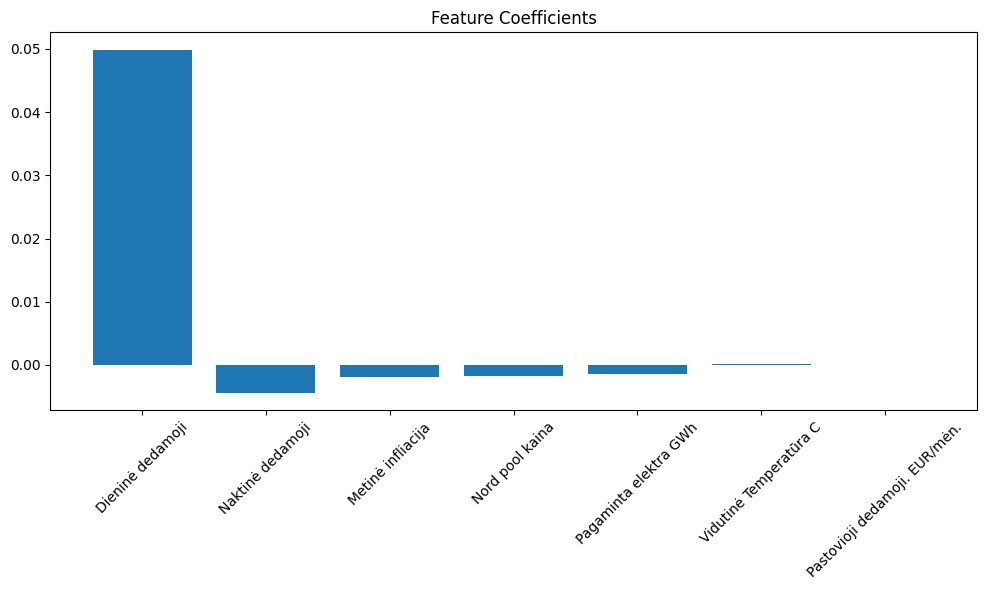

Treniravimo MSE: 1.6517248543889057e-05
Testavimo MSE: 2.1667418105756313e-05
Treniravimo R2: 0.9916793721077316
Testavimo R2: 0.9904752824260347
Kryžminės validacijos (cv=5) R2 reikšmės: [0.99090536 0.98378274 0.99136219 0.98685766 0.99047522]
Kryžminės validacijos (cv=5) vidutinis R2: 0.9886766343854294


In [55]:
Ridge_regresorius(df_Elektra)


In [56]:
Ridge_reg_su_poly(df_Elektra)

Geriausi parametrai: {'alpha': 0.1}
Treniravimo MSE: 2.7277475008741656e-06
Testavimo MSE: 6.0756802928882676e-06
Treniravimo R2: 0.9986258866373215
Testavimo R2: 0.9973292092958647
Kryžminės validacijos (cv=5) R2 reikšmės: [0.99349485 0.99613271 0.99328836 0.99436223 0.9972895 ]
Kryžminės validacijos (cv=5) vidutinis R2: 0.9949135287443236


In [62]:
def KNN_regresorius(df, skaicius=5):
    df_test = df
    X = df_test.drop(columns=['Viena laiko zona'])
    y = df_test['Viena laiko zona']

    # Padalijame į treniravimo ir testavimo rinkinius
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Sukuriame polinominius požymius
    # poly = PolynomialFeatures(degree=2, include_bias=False)
    # X_train_poly = poly.fit_transform(X_train)
    # X_test_poly = poly.transform(X_test)

    # Normalizuojame duomenis
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Sukuriame K-nn Regressor
    knn = KNeighborsRegressor()

    # Nustatome hiperparametrų tinklą
    param_grid = {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan','minkowski']
    }

    # Naudojame GridSearchCV geriausiems parametrams rasti
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skaicius, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Geriausi parametrai
    best_params = grid_search.best_params_

    # Geriausias modelis
    best_model = grid_search.best_estimator_

    # Atliekame prognozes su geriausiu modeliu
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Vertiname modelį
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Kryžminė validacija su pilnu duomenų rinkiniu
    X_combined = pd.concat([X_train, X_test])
    y_combined = pd.concat([y_train, y_test])
    # X_combined_poly = poly.fit_transform(X_combined)
    X_combined_scaled = scaler.fit_transform(X_combined)

    cv_scores = cross_val_score(best_model, X_combined_scaled, y_combined, cv=skaicius, scoring='r2')

    # Rezultatų spausdinimas
    print(f'Geriausi parametrai: {best_params}')
    print(f'Treniravimo MSE: {train_mse}')
    print(f'Testavimo MSE: {test_mse}')
    print(f'Treniravimo R2: {train_r2}')
    print(f'Testavimo R2: {test_r2}')

    print(f'Kryžminės validacijos (cv=5) MSE reikšmės: {cv_scores}')
    print(f'Kryžminės validacijos (cv=5) vidutinis MSE: {cv_scores.mean()}')

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
KNN_regresorius(df_Elektra)

Geriausi parametrai: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Treniravimo MSE: 0.0
Testavimo MSE: 3.4942080371833577e-05
Treniravimo R2: 1.0
Testavimo R2: 0.9846399120853215
Kryžminės validacijos (cv=5) MSE reikšmės: [0.96598598 0.93853243 0.96287967 0.97265334 0.98468288]
Kryžminės validacijos (cv=5) vidutinis MSE: 0.9649468614757458
